In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
# input = torch.randn(3, requires_grad=True)
input = torch.rand(2)
target = torch.empty(2).random_(2)
loss1 = F.binary_cross_entropy_with_logits(input, target)
loss2= F.binary_cross_entropy(input, target)

print (loss1)
print(loss2)

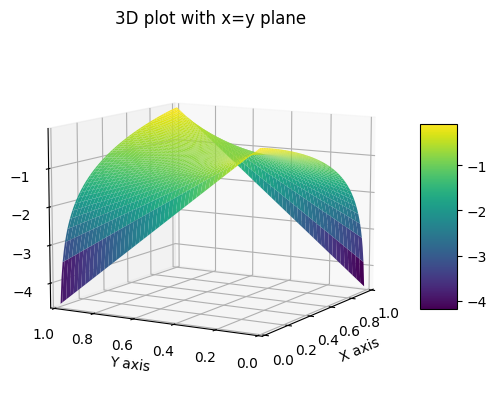

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 定义 x 和 y 的取值范围
x = np.linspace(0.01, 0.99, 100)  # 避免取到 log(0) 的情况
y = np.linspace(0.01, 0.99, 100)  # 避免取到 log(0) 的情况

# 生成网格数据
X, Y = np.meshgrid(x, y)

# 计算 z 的值
Z = Y * np.log(X) + (1 - Y) * np.log(1 - X)

# 创建一个新图形
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 绘制3D表面图
surf = ax.plot_surface(X, Y, Z, cmap='viridis')

# # 定义 x = y 平面
# XY_plane = np.linspace(0.01, 0.99, 100)
# X_plane, Y_plane = np.meshgrid(XY_plane, XY_plane)
# Z_plane = np.ones_like(X_plane) * np.mean(Z)  # 简单设置一个 Z 平面值

# # 若要覆盖整个三维空间的 Z 值，请使用以下方式
# z_min = Z.min()
# z_max = Z.max()
# X_plane, Z_plane = np.meshgrid(XY_plane, np.linspace(z_min, z_max, 100))
# Y_plane = X_plane  # 平面对应的 y 值

# # 绘制 x = y 平面
# ax.plot_surface(X_plane, Y_plane, Z_plane, color='red', alpha=0.5)

# 添加一些图形元素
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('3D plot with x=y plane')

# 设置轴的范围
ax.set_xlim(1, 0)  # 反方向
ax.set_ylim(1, 0)

# 设置视角
ax.view_init(elev=10, azim=30)

# 添加网格和颜色条
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

# 显示图形
plt.show()

Z的最小值: -4.559218987486745，出现在 (X, Y) = (0.01, 0.99)
Z的最大值: -0.056001534354847345，出现在 (X, Y) = (0.01, 0.01)


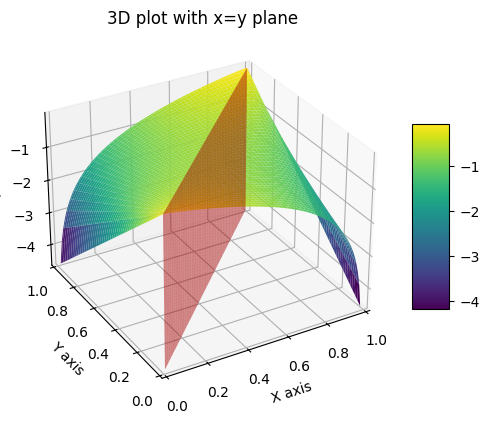

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 定义 x 和 y 的取值范围
x = np.linspace(0.01, 0.99, 100)  # 避免取到 log(0) 的情况
y = np.linspace(0.01, 0.99, 100)  # 避免取到 log(0) 的情况

# 生成网格数据
X, Y = np.meshgrid(x, y)

# 计算 z 的值
Z = Y * np.log(X) + (1 - Y) * np.log(1 - X)

# 找到 Z 的最小值和最大值，以及对应的 X 和 Y
z_min = Z.min()
z_max = Z.max()
min_index = np.unravel_index(np.argmin(Z, axis=None), Z.shape)
max_index = np.unravel_index(np.argmax(Z, axis=None), Z.shape)

x_min, y_min = X[min_index], Y[min_index]
x_max, y_max = X[max_index], Y[max_index]

print(f"Z的最小值: {z_min}，出现在 (X, Y) = ({x_min}, {y_min})")
print(f"Z的最大值: {z_max}，出现在 (X, Y) = ({x_max}, {y_max})")

# 创建一个新图形
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 绘制3D表面图
surf = ax.plot_surface(X, Y, Z, cmap='viridis')

# 定义 x = y 平面
XY_plane = np.linspace(0.01, 0.99, 100)
X_plane, Y_plane = np.meshgrid(XY_plane, XY_plane)
Z_plane = np.ones_like(X_plane) * np.mean(Z)  # 简单设置一个 Z 平面值

# 若要覆盖整个三维空间的 Z 值，请使用以下方式
z_min = Z.min()
z_max = Z.max()
X_plane, Z_plane = np.meshgrid(XY_plane, np.linspace(z_min, z_max, 100))
Y_plane = X_plane  # 平面对应的 y 值

# 绘制 x = y 平面
ax.plot_surface(X_plane, Y_plane, Z_plane, color='red', alpha=0.5)

# 添加一些图形元素
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('3D plot with x=y plane')

# 设置轴的范围
ax.set_xlim(1, 0)  # 反方向
ax.set_ylim(1, 0)

# 设置视角
ax.view_init(elev=30, azim=60)

# 添加网格和颜色条
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

# 显示图形
plt.show()

(X, Y) = (0.01, 0.01), Z = -0.05600
(X, Y) = (0.02, 0.02), Z = -0.09765
(X, Y) = (0.03, 0.03), Z = -0.13404
(X, Y) = (0.04, 0.04), Z = -0.16698
(X, Y) = (0.05, 0.05), Z = -0.19732
(X, Y) = (0.06, 0.06), Z = -0.22558
(X, Y) = (0.07, 0.07), Z = -0.25207
(X, Y) = (0.08, 0.08), Z = -0.27704
(X, Y) = (0.09, 0.09), Z = -0.30066
(X, Y) = (0.10, 0.10), Z = -0.32308
(X, Y) = (0.11, 0.11), Z = -0.34440
(X, Y) = (0.12, 0.12), Z = -0.36471
(X, Y) = (0.13, 0.13), Z = -0.38408
(X, Y) = (0.14, 0.14), Z = -0.40257
(X, Y) = (0.15, 0.15), Z = -0.42025
(X, Y) = (0.16, 0.16), Z = -0.43715
(X, Y) = (0.17, 0.17), Z = -0.45331
(X, Y) = (0.18, 0.18), Z = -0.46878
(X, Y) = (0.19, 0.19), Z = -0.48358
(X, Y) = (0.20, 0.20), Z = -0.49773
(X, Y) = (0.21, 0.21), Z = -0.51127
(X, Y) = (0.22, 0.22), Z = -0.52421
(X, Y) = (0.23, 0.23), Z = -0.53658
(X, Y) = (0.24, 0.24), Z = -0.54839
(X, Y) = (0.25, 0.25), Z = -0.55966
(X, Y) = (0.26, 0.26), Z = -0.57040
(X, Y) = (0.27, 0.27), Z = -0.58063
(X, Y) = (0.28, 0.28), Z = -

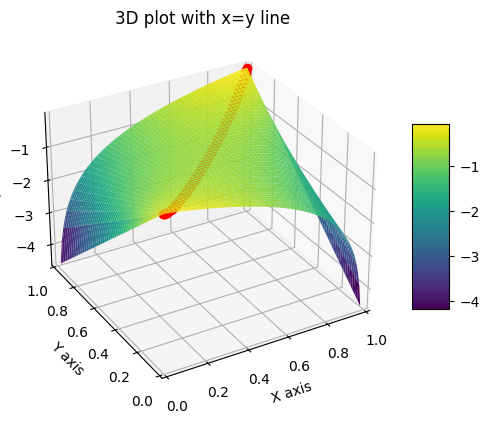

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 定义 x 和 y 的取值范围
x = np.linspace(0.01, 0.99, 100)  # 注意避免 log(0)
y = x  # 因为 x = y

# 计算 z 的值
z_values = y * np.log(x) + (1 - y) * np.log(1 - x)

# 打印结果
for xi, yi, zi in zip(x, y, z_values):
    print(f"(X, Y) = ({xi:.2f}, {yi:.2f}), Z = {zi:.5f}")

# 创建一个新图形
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 生成网格数据
X, Y = np.meshgrid(x, y)
Z = Y * np.log(X) + (1 - Y) * np.log(1 - X)

# 绘制3D表面图
surf = ax.plot_surface(X, Y, Z, cmap='viridis')

# 定义 x = y 平面数据
X_plane = Y_plane = np.linspace(0.01, 0.99, 100)
Z_plane = Z[np.arange(len(Z)), np.arange(len(Z))]  # 直接获取对角线，因为 x=y

# 绘制 x = y 平面
ax.plot(X_plane, Y_plane, Z_plane, color='red', marker='o', linestyle='none')

# 添加一些图形元素
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('3D plot with x=y line')

# 设置轴的范围
ax.set_xlim(1, 0)  # 反方向
ax.set_ylim(1,0)

# 设置视角
ax.view_init(elev=30, azim=60)

# 添加网格和颜色条
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

# 显示图形
plt.show()

In [ ]:
class TruncatedLoss(nn.Module):

    def __init__(self, q=0.7, k=0.5, trainset_size=50000):
        super(TruncatedLoss, self).__init__()
        self.q = q
        self.k = k
        self.weight = torch.nn.Parameter(data=torch.ones(trainset_size, 1), requires_grad=False)
             
    def forward(self, logits, targets, indexes):
        p = F.softmax(logits, dim=1)
        Yg = torch.gather(p, 1, torch.unsqueeze(targets, 1))

        loss = ((1-(Yg**self.q))/self.q)*self.weight[indexes] - ((1-(self.k**self.q))/self.q)*self.weight[indexes]
        loss = torch.mean(loss)

        return loss

    def update_weight(self, logits, targets, indexes):
        p = F.softmax(logits, dim=1)
        Yg = torch.gather(p, 1, torch.unsqueeze(targets, 1))
        Lq = ((1-(Yg**self.q))/self.q)
        Lqk = np.repeat(((1-(self.k**self.q))/self.q), targets.size(0))
        Lqk = torch.from_numpy(Lqk).type(torch.cuda.FloatTensor)
        Lqk = torch.unsqueeze(Lqk, 1)
        

        condition = torch.gt(Lqk, Lq)
        self.weight[indexes] = condition.type(torch.cuda.FloatTensor)

In [ ]:
import torch
import torch.nn as nn
nn.BCEWithLogitsLoss
torch.binary_cross_entropy_with_logits